# Loading in Residual Count Dataset

- each value shows gene expression via RNA sequencing

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('data/RNAseqHarm/Mayo_Residualized_counts_(diagnosis-sex-age-death).tsv', delimiter="\t")
df1 = pd.read_csv('data/RNAseqHarm/RNAseq_Harmonization_Mayo_combined_metadata.csv')

In [28]:
df2 = df.copy()
df2 = df2.rename(columns={'feature':'index'})
df2 = df2.set_index('index').T
df2.reset_index(inplace=True)
df2.rename(columns={'index':'ID'}, inplace=True)

In [29]:
df2.head()

index,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288048,ENSG00000288049,ENSG00000288060,ENSG00000288062,ENSG00000288065,ENSG00000288066,ENSG00000288067,ENSG00000288075,ENSG00000288096,ENSG00000288107
0,1005_TCX,1.046548,-0.093520,-0.651872,-0.577207,0.496494,0.713873,1.082678,1.642342,0.592240,...,2.611950,-0.139720,-3.602060,0.869742,0.511953,-0.369245,-2.524820,1.218260,-0.948977,-0.649119
1,1010_TCX,1.254330,-0.055011,-0.441558,-1.177675,1.203431,0.811320,0.727590,1.124810,0.362717,...,2.824216,5.481581,-3.894036,0.200439,-0.197727,-0.560569,-5.273661,1.337400,0.098828,0.030213
2,1015_TCX,1.097084,-0.293138,-1.059796,-1.200557,1.487779,0.647500,0.648345,1.071640,-0.068540,...,2.719888,5.008784,-3.493799,0.519578,-0.708884,-0.688496,-3.840791,0.662331,-0.724410,-0.364670
3,1019_TCX,1.259836,-0.084687,-0.371088,-0.524649,1.994887,1.626890,0.498995,1.131495,0.290170,...,2.481737,-0.334184,-3.347012,-0.164010,-0.382541,-0.923337,-3.403981,0.706165,-0.472267,-0.996989
4,1029_TCX,0.549788,-0.187649,-0.921321,-1.191934,2.309108,1.791418,0.603831,1.075608,0.253768,...,2.577099,-1.013808,-4.705916,-0.305552,-0.363572,-0.474168,-2.929537,0.490556,0.466015,-2.038146


In [30]:
# making sure this transposition method keeps all values as floats
df2.select_dtypes(include=['object']).columns.tolist()

['ID']

In [31]:
df2.shape

(505, 19438)

In [32]:
df2['ID']

0      1005_TCX
1      1010_TCX
2      1015_TCX
3      1019_TCX
4      1029_TCX
         ...   
500     948_CBE
501     952_CBE
502     966_CBE
503     976_CBE
504     991_CBE
Name: ID, Length: 505, dtype: object

In [33]:
df1['specimenID'].value_counts().head()

1000_CER     1
11412_TCX    1
11417_TCX    1
11422_TCX    1
11423_TCX    1
Name: specimenID, dtype: int64

In [34]:
df1.columns

Index(['specimenID', 'platform', 'RIN', 'libraryPrep',
       'libraryPreparationMethod', 'runType', 'readLength', 'flowcell',
       'individualID', 'specimenIdSource', 'organ', 'tissue',
       'nucleicAcidSource', 'assay', 'exclude', 'excludeReason',
       'Exclusion_Category', 'individualIdSource', 'species', 'sex', 'race',
       'ageDeath', 'apoeGenotype', 'pmi', 'diagnosis', 'Braak', 'thal'],
      dtype='object')

In [35]:
dfy = df1

In [36]:
dfy['tissue'].value_counts()

temporal cortex    319
cerebellum         278
Name: tissue, dtype: int64

In [37]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   specimenID                597 non-null    object 
 1   platform                  597 non-null    object 
 2   RIN                       586 non-null    float64
 3   libraryPrep               597 non-null    object 
 4   libraryPreparationMethod  597 non-null    object 
 5   runType                   597 non-null    object 
 6   readLength                597 non-null    int64  
 7   flowcell                  586 non-null    object 
 8   individualID              597 non-null    int64  
 9   specimenIdSource          586 non-null    object 
 10  organ                     597 non-null    object 
 11  tissue                    597 non-null    object 
 12  nucleicAcidSource         597 non-null    object 
 13  assay                     597 non-null    object 
 14  exclude   

In [38]:
dfy['excludeReason'].value_counts()

(RNAseq) - GeneBodyCoverage Plot (RSeQC)                                 17
(GWAS) - Heterozygosity Outlier                                           8
(RNAseq) - Principal Components Analysis                                  5
(GWAS) - > 3rd degree relative with another sample                        4
(GWAS and RNAseq) - Sex mis-match                                         4
(Pathology) - Does not meet control criteria (Braak > 3.0)                4
(GWAS) - Eigenstrat Outlier                                               3
(RNAseq) - Low Mapped Reads                                               1
(GWAS, RNAseq) - Heterozygosity Outlier, GeneBodyCoverage Plot(RSeQC)     1
(RNAseq) - Sex mis-match                                                  1
Name: excludeReason, dtype: int64

In [39]:
dfy = dfy[dfy['excludeReason'].isnull()]

In [40]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 596
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   specimenID                549 non-null    object 
 1   platform                  549 non-null    object 
 2   RIN                       548 non-null    float64
 3   libraryPrep               549 non-null    object 
 4   libraryPreparationMethod  549 non-null    object 
 5   runType                   549 non-null    object 
 6   readLength                549 non-null    int64  
 7   flowcell                  548 non-null    object 
 8   individualID              549 non-null    int64  
 9   specimenIdSource          548 non-null    object 
 10  organ                     549 non-null    object 
 11  tissue                    549 non-null    object 
 12  nucleicAcidSource         549 non-null    object 
 13  assay                     549 non-null    object 
 14  exclude   

In [41]:
dfy['apoeGenotype'].value_counts()

33.0    303
34.0    125
23.0     60
44.0     14
24.0      4
22.0      2
Name: apoeGenotype, dtype: int64

In [42]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 596
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   specimenID                549 non-null    object 
 1   platform                  549 non-null    object 
 2   RIN                       548 non-null    float64
 3   libraryPrep               549 non-null    object 
 4   libraryPreparationMethod  549 non-null    object 
 5   runType                   549 non-null    object 
 6   readLength                549 non-null    int64  
 7   flowcell                  548 non-null    object 
 8   individualID              549 non-null    int64  
 9   specimenIdSource          548 non-null    object 
 10  organ                     549 non-null    object 
 11  tissue                    549 non-null    object 
 12  nucleicAcidSource         549 non-null    object 
 13  assay                     549 non-null    object 
 14  exclude   

In [43]:
dfy['diagnosis'].value_counts()

progressive supranuclear palsy    161
Alzheimer Disease                 160
control                           134
pathological aging                 94
Name: diagnosis, dtype: int64

In [44]:
dfy = dfy[['specimenID','diagnosis', 'sex', 'tissue']]

In [45]:
dfy

,specimenID,diagnosis,sex,tissue
0,1000_CER,Alzheimer Disease,female,cerebellum
1,1010_CER,Alzheimer Disease,male,cerebellum
2,1015_CER,Alzheimer Disease,male,cerebellum
3,1019_CER,Alzheimer Disease,female,cerebellum
4,1027_CER,Alzheimer Disease,male,cerebellum
...,...,...,...,...
592,18200_TCX,pathological aging,male,temporal cortex
593,18211_TCX,pathological aging,female,temporal cortex
594,18217_TCX,pathological aging,female,temporal cortex
595,18220_TCX,pathological aging,female,temporal cortex


In [46]:
dfy = dfy.copy()
dfy['HasAlzheimer'] = dfy['diagnosis'].apply(lambda x: 1 if x == "Alzheimer Disease" else 0 if x == "control" else np.nan)

In [47]:
dfy.head(1)

,specimenID,diagnosis,sex,tissue,HasAlzheimer
0,1000_CER,Alzheimer Disease,female,cerebellum,1.0


In [48]:
dfy = dfy.dropna()

In [49]:
dfx = pd.merge(dfy, df2, left_on='specimenID', right_on='ID', how='inner')

In [50]:
dfx['specimenID'].value_counts()

1005_TCX     1
732_TCX      1
1942_TCX     1
1943_TCX     1
1944_TCX     1
            ..
11398_TCX    1
11399_TCX    1
11400_TCX    1
11417_TCX    1
991_TCX      1
Name: specimenID, Length: 147, dtype: int64

In [51]:
dfx.head()

,specimenID,diagnosis,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,...,ENSG00000288048,ENSG00000288049,ENSG00000288060,ENSG00000288062,ENSG00000288065,ENSG00000288066,ENSG00000288067,ENSG00000288075,ENSG00000288096,ENSG00000288107
0,1005_TCX,Alzheimer Disease,female,temporal cortex,1.0,1005_TCX,1.046548,-0.093520,-0.651872,-0.577207,...,2.611950,-0.139720,-3.602060,0.869742,0.511953,-0.369245,-2.524820,1.218260,-0.948977,-0.649119
1,1010_TCX,Alzheimer Disease,male,temporal cortex,1.0,1010_TCX,1.254330,-0.055011,-0.441558,-1.177675,...,2.824216,5.481581,-3.894036,0.200439,-0.197727,-0.560569,-5.273661,1.337400,0.098828,0.030213
2,1015_TCX,Alzheimer Disease,male,temporal cortex,1.0,1015_TCX,1.097084,-0.293138,-1.059796,-1.200557,...,2.719888,5.008784,-3.493799,0.519578,-0.708884,-0.688496,-3.840791,0.662331,-0.724410,-0.364670
3,1019_TCX,Alzheimer Disease,female,temporal cortex,1.0,1019_TCX,1.259836,-0.084687,-0.371088,-0.524649,...,2.481737,-0.334184,-3.347012,-0.164010,-0.382541,-0.923337,-3.403981,0.706165,-0.472267,-0.996989
4,1029_TCX,Alzheimer Disease,female,temporal cortex,1.0,1029_TCX,0.549788,-0.187649,-0.921321,-1.191934,...,2.577099,-1.013808,-4.705916,-0.305552,-0.363572,-0.474168,-2.929537,0.490556,0.466015,-2.038146


In [52]:
dfx['tissue'].value_counts()

temporal cortex    147
Name: tissue, dtype: int64

In [53]:
dfx['sex'] = dfx['sex'].map({'female': 0, 'male': 1})

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
from keras import models
from keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [58]:
from tqdm import tqdm

In [59]:
from umap import UMAP
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniforge/base/en

In [60]:
dfx.head(1)

,specimenID,diagnosis,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,...,ENSG00000288048,ENSG00000288049,ENSG00000288060,ENSG00000288062,ENSG00000288065,ENSG00000288066,ENSG00000288067,ENSG00000288075,ENSG00000288096,ENSG00000288107
0,1005_TCX,Alzheimer Disease,0,temporal cortex,1.0,1005_TCX,1.046548,-0.09352,-0.651872,-0.577207,...,2.61195,-0.13972,-3.60206,0.869742,0.511953,-0.369245,-2.52482,1.21826,-0.948977,-0.649119


In [39]:
dfx.to_csv('dfxMAYO.csv', index=False) 

In [61]:
X = dfx.drop(['specimenID', 'diagnosis', 'HasAlzheimer', 'ID'], axis=1)  
y = dfx['HasAlzheimer']

categorical_cols = ['tissue']  # Add other categorical column names if needed

# Define numerical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [62]:
print(X.columns)

Index(['sex', 'tissue', 'ENSG00000000003', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       ...
       'ENSG00000288048', 'ENSG00000288049', 'ENSG00000288060',
       'ENSG00000288062', 'ENSG00000288065', 'ENSG00000288066',
       'ENSG00000288067', 'ENSG00000288075', 'ENSG00000288096',
       'ENSG00000288107'],
      dtype='object', length=19439)


In [320]:
all_floats = ((X.dtypes == 'float64') | (X.dtypes == 'float32')).all()
print(all_floats)

False


In [321]:
all_floats = ((X[numerical_cols].dtypes == 'float64') | (X[numerical_cols].dtypes == 'float32')).all()
print(all_floats)

True


In [316]:
not_floats = X.dtypes[~((X.dtypes == 'float64') | (X.dtypes == 'float32'))]
print(not_floats)


sex        int64
tissue    object
dtype: object


In [66]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

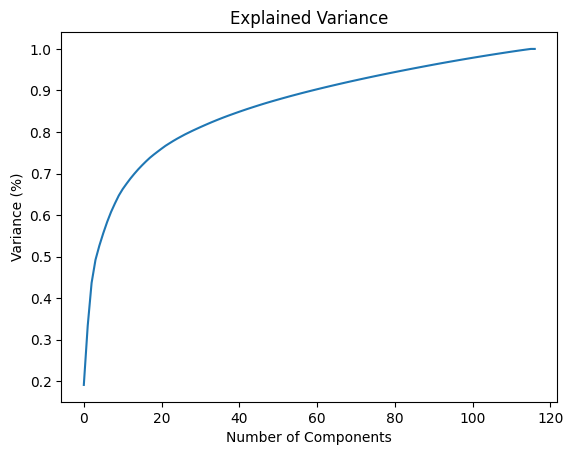

In [68]:
# Fit PCA on your preprocessed data
pca = PCA().fit(X_train_preprocessed)

# Plot the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_60915/2238343830.py:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

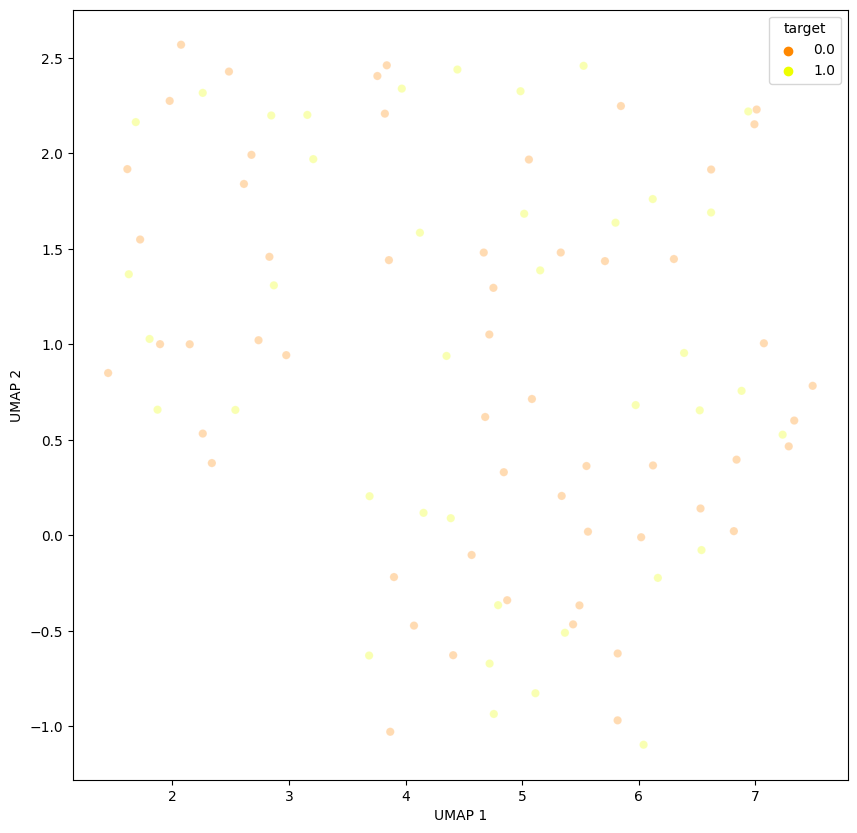

In [69]:
# Fit UMAP on your preprocessed data
umap = UMAP(n_components=2).fit_transform(preprocessor.transform(X_train))

# Create a DataFrame for visualization
umap_df = pd.DataFrame(data = umap, columns = ['UMAP 1', 'UMAP 2'])

# Add target variable for coloring
umap_df['target'] = y_train

# Scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="UMAP 1", y="UMAP 2",
    hue="target",
    palette=sns.color_palette("hsv", 10),
    data=umap_df,
    legend="full",
    alpha=0.3
)

# Now to Modeling!

In [68]:
# Define the model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)


# Create and evaluate the pipeline
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model1)
                       ])

# Fit and predict
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)



In [70]:

print(classification_report(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

NameError: name 'y_pred1' is not defined

## Logistic Regression

In [87]:
pca = PCA()
model2 = LogisticRegression(max_iter=1000)

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model2)
                       ])


In [71]:
model2 = LogisticRegression(max_iter=1000)

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model2)
                       ])


In [72]:
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.33%


In [72]:

print(classification_report(y_test, y_pred2))

print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        12
         1.0       0.90      1.00      0.95        18

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30

[[10  2]
 [ 0 18]]


In [73]:
model3 = xgb.XGBClassifier()

pipe3 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model3)
                       ])


In [74]:

pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.33%


In [75]:

print(classification_report(y_test, y_pred3))

print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        12
         1.0       0.90      1.00      0.95        18

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30

[[10  2]
 [ 0 18]]


In [76]:
from keras import regularizers
from scikeras.wrappers import KerasClassifier

In [77]:
X.shape

(147, 19439)

In [78]:
def create_model():
    model4 = models.Sequential()
    model4.add(layers.Dense(512, activation='relu', input_shape=(19439,)))
    model4.add(layers.Dense(256, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(128, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(1, activation='sigmoid'))

    model4.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
    return model4


In [79]:
model5 = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=2)

In [80]:
pipe5 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model5)
                       ])


In [81]:
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Epoch 1/50


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2023-07-31 14:43:38.415410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 - 1s - loss: 0.7644 - acc: 0.6667 - 802ms/epoch - 67ms/step
Epoch 2/50
12/12 - 0s - loss: 0.5602 - acc: 0.7265 - 144ms/epoch - 12ms/step
Epoch 3/50
12/12 - 0s - loss: 0.4637 - acc: 0.8120 - 135ms/epoch - 11ms/step
Epoch 4/50
12/12 - 0s - loss: 0.4981 - acc: 0.8034 - 133ms/epoch - 11ms/step
Epoch 5/50
12/12 - 0s - loss: 0.3349 - acc: 0.8718 - 133ms/epoch - 11ms/step
Epoch 6/50
12/12 - 0s - loss: 0.2437 - acc: 0.8889 - 144ms/epoch - 12ms/step
Epoch 7/50
12/12 - 0s - loss: 0.2267 - acc: 0.8803 - 138ms/epoch - 12ms/step
Epoch 8/50
12/12 - 0s - loss: 0.2389 - acc: 0.8889 - 137ms/epoch - 11ms/step
Epoch 9/50
12/12 - 0s - loss: 0.1541 - acc: 0.9402 - 138ms/epoch - 11ms/step
Epoch 10/50
12/12 - 0s - loss: 0.1912 - acc: 0.9316 - 131ms/epoch - 11ms/step
Epoch 11/50
12/12 - 0s - loss: 0.2133 - acc: 0.9316 - 129ms/epoch - 11ms/step
Epoch 12/50
12/12 - 0s - loss: 0.1552 - acc: 0.9573 - 127ms/epoch - 11ms/step
Epoch 13/50
12/12 - 0s - loss: 0.1358 - acc: 0.9573 - 134ms/epoch - 11ms/step
Epoch 

2023-07-31 14:43:45.740555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [82]:
y_pred_proba = pipe5.predict(X_test)
y_pred5 = np.where(y_pred_proba > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


3/3 - 0s - 16ms/epoch - 5ms/step
Accuracy: 86.67%


In [83]:

print(classification_report(y_test, y_pred5))

print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82        12
         1.0       0.85      0.94      0.89        18

    accuracy                           0.87        30
   macro avg       0.88      0.85      0.86        30
weighted avg       0.87      0.87      0.86        30

[[ 9  3]
 [ 1 17]]


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the parameter grid for logistic regression with penalty
param_grid_with_penalty = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the parameter grid for logistic regression without penalty
param_grid_without_penalty = {
    'model__penalty': [None],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create a base model
logreg = LogisticRegression(max_iter=10000)

# Create pipeline
pipe6 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', logreg)
                       ])

# Instantiate the grid search model
grid_search_with_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_with_penalty, cv=5, n_jobs=-1, verbose=2)
grid_search_without_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_without_penalty, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_with_penalty.fit(X_train, y_train)
grid_search_without_penalty.fit(X_train, y_train)

# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)


Fitting 5 folds for each of 105 candidates, totalling 525 fits


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters with penalty: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'newton-cg'}
Best score with penalty: 0.941304347826087
Best score without penalty: 0.9246376811594204


In [85]:
param_grid_with_penalty = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l2'],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

param_grid_elasticnet = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['elasticnet'],
    'model__solver': ['saga'],
    'model__l1_ratio': [0.2, 0.4, 0.6, 0.8]  # You might want to adjust this list to suit your needs
}

param_grid_without_penalty = {
    'model__penalty': ['none'],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Then you can run your GridSearchCV as before, but add an additional one for the 'elasticnet' penalty
grid_search_elasticnet = GridSearchCV(estimator=pipe6, param_grid=param_grid_elasticnet, cv=5, n_jobs=-1, verbose=2)
grid_search_elasticnet.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [86]:
# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)

Best parameters with penalty: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'newton-cg'}
Best score with penalty: 0.941304347826087
Best score without penalty: 0.9246376811594204


In [109]:
# Get the best parameters from the grid search
best_params = grid_search_with_penalty.best_params_

# Adjust the parameters by removing 'model__'
best_params_adjusted = {k.replace('model__', ''): v for k, v in best_params.items()}

# Fit a new model using the best parameters from the grid search
best_model = LogisticRegression(C=best_params_adjusted['C'], 
                                penalty=best_params_adjusted['penalty'], 
                                solver=best_params_adjusted['solver'], 
                                max_iter=1000)

# Create and evaluate the pipeline
pipe7 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', best_model)
                       ])

# Fit and predict
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred7))

print(confusion_matrix(y_test, y_pred7))


NameError: name 'grid_search_with_penalty' is not defined

In [73]:


# Fit a new model using the best parameters from the grid search
best_model = LogisticRegression()

# Create and evaluate the pipeline
pipe7 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', best_model)
                       ])

# Fit and predict
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred7))

print(confusion_matrix(y_test, y_pred7))


Accuracy: 93.33%
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        12
         1.0       0.90      1.00      0.95        18

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30

[[10  2]
 [ 0 18]]


In [74]:
# Get the one-hot encoder from the preprocessor
onehot = pipe7.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features = onehot.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features = numerical_cols

# Combine original and one-hot encoded feature names
feature_names = np.concatenate([original_features, onehot_features])

# Get the coefficients from the model
coefficients = pipe7.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series = pd.Series(coefficients, index=feature_names)

# Get the absolute values to consider the magnitude of the coefficients
abs_coefs = coef_series.abs()

# Sort the features by the absolute values of their coefficients in descending order
sorted_features = abs_coefs.sort_values(ascending=False)

# Print the top n features
n = 50  # change this to the number of top features you want to print
print(sorted_features[:n])


ENSG00000231443    0.018245
ENSG00000285781    0.017123
ENSG00000166788    0.016502
ENSG00000235946    0.016153
ENSG00000285838    0.016034
ENSG00000251143    0.015689
ENSG00000205639    0.015554
ENSG00000185689    0.015441
ENSG00000246477    0.015314
ENSG00000153064    0.015158
ENSG00000103485    0.015048
ENSG00000104415    0.014820
ENSG00000108001    0.014789
ENSG00000234537    0.014777
ENSG00000164438    0.014666
ENSG00000049167    0.014604
ENSG00000263011    0.014567
ENSG00000253642    0.014477
ENSG00000233954    0.014473
ENSG00000239827    0.014452
ENSG00000115523    0.014374
ENSG00000187446    0.014346
ENSG00000254675    0.014327
ENSG00000125430    0.014270
ENSG00000178078    0.014256
ENSG00000168743    0.014110
ENSG00000287011    0.013930
ENSG00000259055    0.013899
ENSG00000160224    0.013829
ENSG00000004939    0.013768
ENSG00000125409    0.013696
ENSG00000126249    0.013659
ENSG00000042781    0.013624
ENSG00000114767    0.013618
ENSG00000283031    0.013546
ENSG00000278266    0

In [75]:
# Get the one-hot encoder from the preprocessor
onehot1 = pipe7.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features1 = onehot1.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features1 = numerical_cols

# Combine original and one-hot encoded feature names
feature_names1 = np.concatenate([original_features1, onehot_features1])

# Get the coefficients from the model
coefficients1 = pipe7.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series1 = pd.Series(coefficients1, index=feature_names)

# Sort the features by their coefficients in ascending order. The features with the most negative coefficients will come first.
sorted_features1 = coef_series1.sort_values(ascending=False)

# Print the top n features with the most negative coefficients
n = 50  # change this to the number of top features you want to print
print(sorted_features1[:n])


ENSG00000285781    0.017123
ENSG00000166788    0.016502
ENSG00000235946    0.016153
ENSG00000285838    0.016034
ENSG00000246477    0.015314
ENSG00000153064    0.015158
ENSG00000103485    0.015048
ENSG00000104415    0.014820
ENSG00000234537    0.014777
ENSG00000164438    0.014666
ENSG00000263011    0.014567
ENSG00000253642    0.014477
ENSG00000125430    0.014270
ENSG00000168743    0.014110
ENSG00000287011    0.013930
ENSG00000160224    0.013829
ENSG00000125409    0.013696
ENSG00000126249    0.013659
ENSG00000042781    0.013624
ENSG00000114767    0.013618
ENSG00000283031    0.013546
ENSG00000204219    0.013249
ENSG00000250616    0.013097
ENSG00000198356    0.013045
ENSG00000145217    0.012991
ENSG00000133110    0.012970
ENSG00000267383    0.012961
ENSG00000280670    0.012947
ENSG00000286710    0.012930
ENSG00000231050    0.012867
ENSG00000147536    0.012801
ENSG00000118004    0.012796
ENSG00000249661    0.012751
ENSG00000159374    0.012726
ENSG00000106483    0.012698
ENSG00000250120    0

In [77]:
ETG = pd.read_csv('data/RNAseqHarm/Mayo_Differential_Expression_(diagnosis-sex).tsv', delimiter="\t")

In [78]:
ETG.columns

Index(['Comparison', 'ensembl_gene_id', 'logFC', 'CI.L', 'CI.R', 'AveExpr',
       't', 'P.Value', 'adj.P.Val', 'Direction', 'hgnc_symbol',
       'percentage_gene_gc_content', 'gene_biotype', 'chromosome_name',
       'gene_length'],
      dtype='object')

In [79]:
ETG = ETG[['ensembl_gene_id','hgnc_symbol']]

In [80]:
ETG.head()

,ensembl_gene_id,hgnc_symbol
0,ENSG00000228521,AC099552.3
1,ENSG00000163221,S100A12
2,ENSG00000287689,AC009704.3
3,ENSG00000124107,SLPI
4,ENSG00000287865,AC099552.5


In [81]:
ETG = ETG.drop_duplicates(subset='hgnc_symbol')

In [82]:
print(sorted_features.head())
print(sorted_features.tail())

ENSG00000231443    0.018245
ENSG00000285781    0.017123
ENSG00000166788    0.016502
ENSG00000235946    0.016153
ENSG00000285838    0.016034
dtype: float64
ENSG00000070601    7.305446e-07
ENSG00000253667    5.108916e-07
ENSG00000204323    3.649808e-07
ENSG00000204536    2.874092e-07
ENSG00000268601    2.450828e-07
dtype: float64


In [83]:
# Reset the index of sorted_features
sorted_features = sorted_features.reset_index()

In [86]:
# Rename the columns of sorted_features for the merge operation
sorted_features.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df = pd.merge(sorted_features, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df.set_index('hgnc_symbol', inplace=True)

# Select the top n features
top_features = merged_df['coef'].head(50)


In [87]:
print(ETG['ensembl_gene_id'].nunique())
print(ETG.shape[0])


19427
19427


In [88]:
X.shape

(147, 19439)

In [89]:
top_features

hgnc_symbol
AC124944.1     0.018245
AL117340.1     0.017123
SAAL1          0.016502
AC234783.1     0.016153
AL646090.2     0.016034
AP002490.1     0.015689
MFSD2B         0.015554
C6orf201       0.015441
AF131216.1     0.015314
BANK1          0.015158
QPRT           0.015048
CCN4           0.014820
EBF3           0.014789
AL354751.1     0.014777
TLX3           0.014666
ERCC8          0.014604
AC108134.4     0.014567
AF279873.3     0.014477
UQCRHL         0.014473
SUGT1P3        0.014452
GNLY           0.014374
CHP1           0.014346
AP003032.1     0.014327
HS3ST3B1       0.014270
STAP2          0.014256
NPNT           0.014110
AC003077.1     0.013930
AL591770.1     0.013899
AIRE           0.013829
SLC4A1         0.013768
TEKT3          0.013696
PDCD2L         0.013659
USH2A          0.013624
RRP9           0.013618
AC009242.1     0.013546
AC079949.2     0.013540
MAP3K13        0.013499
PMS2P5         0.013429
RHD            0.013383
EXOC3          0.013347
TMEM202-AS1    0.013278
TCEA

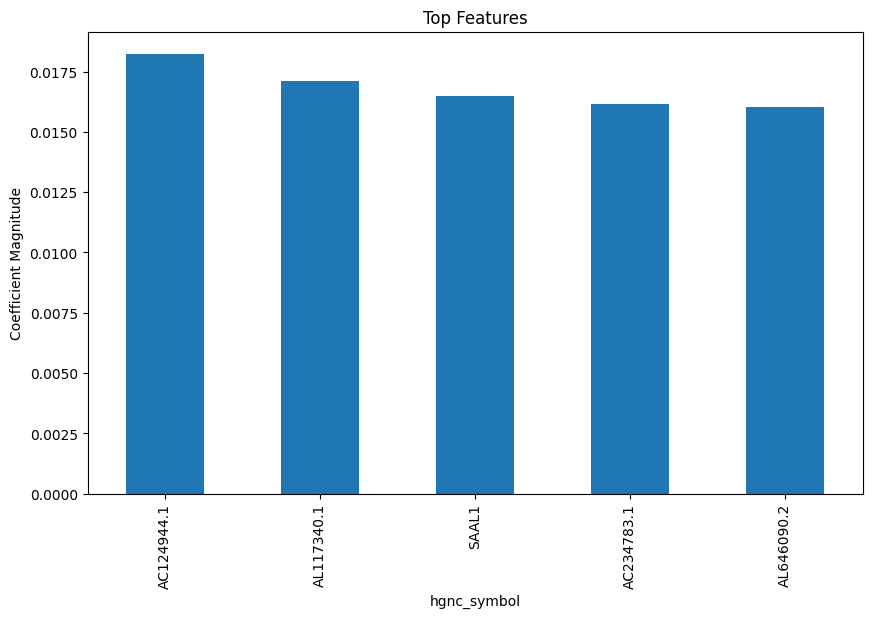

In [150]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))  # adjust the size of the figure as needed
top_features.plot(kind='bar')
plt.title('Top Features')
plt.ylabel('Coefficient Magnitude')
plt.show()
